<a href="https://colab.research.google.com/github/anushhkaaa/Distribution-Transformer-Health-Indexing/blob/main/Health_Indexing_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
data = pd.read_csv('/content/Train set.csv')  #reading the training dataset
data.head(5)

,SL.,kVA,Make,LT fusing count,Average KVA loading till the month of failure,LT fault,updated make Score,NEW/REP,% average KVA loading,Peak Current,normalised peak heat index,O/D,Cooling Circuit choked observation,godown overhauling,Age
0,1,315,MARSONS,0,35.761,0,5.5,0,11.35,0.498,0.0000,1.4,1.0,0,18.0
1,2,315,TRANSPOGEAR MFG. CO. (I) PVT. LTD.,0,48.546,0,5.5,1,15.41,0.516,0.0000,1.4,1.0,0,25.0
2,3,315,KIRLOSKAR,0,143.229,0,6.0,0,45.47,0.979,25.1875,1.4,1.0,0,30.0
3,4,315,MARSONS,0,143.228,0,5.5,0,45.47,0.771,25.8750,1.4,1.0,0,24.0
4,5,400,RAYCHEM RPG LIMITED,0,124.336,0,2.0,0,31.08,0.851,0.6875,1.4,1.0,0,12.0


In [225]:
df = pd.read_csv('/content/Test set.csv') #reading the test dataset
df.head(5)

,SL.,kVA,Make,LT fusing count,Average KVA loading till the month of failure,LT fault,updated make Score,NEW/REP,% average KVA loading,Peak Current,normalised peak heat index,O/D,Cooling Circuit choked observation,godown overhauling,Age
0,122,315,ABHAY TRANSFORMERS,0,75.923,0,4.0,0,24.10,1.025,0.6875,1.4,1.0,0,16.500
1,123,315,ABHAY TRANSFORMERS,0,34.551,0,4.0,0,10.97,0.721,0.0000,1.4,1.0,0,17.333
2,124,315,UNIVERSAL MAGNETICS,0,42.182,0,6.0,0,13.39,0.887,0.0000,1.1,1.0,0,19.250
3,125,315,MARSONS,0,41.951,0,5.5,0,13.32,0.582,0.0000,1.4,1.0,5,16.167
4,126,315,ABHAY TRANSFORMERS,0,93.333,0,4.0,0,29.63,1.164,19.5000,1.4,1.0,0,17.250


In [226]:
# dropping unnecessary columns that do not contribute to health indexing

data = data.drop(['SL.', 'Make', 'kVA', 'LT fusing count', 'Average KVA loading till the month of failure'], axis =1)
df = df.drop(['SL.', 'kVA', 'Make', 'LT fusing count', 'Average KVA loading till the month of failure'], axis =1)

In [227]:
# finding the shape of our features
print("The shape of training dataset is: ",  data.shape)
# describing our training data
data.describe()

The shape of training dataset is:  (120, 10)


,LT fault,updated make Score,NEW/REP,% average KVA loading,Peak Current,normalised peak heat index,O/D,Cooling Circuit choked observation,godown overhauling,Age
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.333333,4.045833,0.308333,38.471333,1.094956,283.852970,1.312500,0.975000,1.183333,18.385417
std,2.220354,1.590407,0.463741,27.526217,0.340295,819.588661,0.136931,0.109429,2.161478,10.517038
min,0.000000,1.000000,0.000000,6.930000,0.218200,0.000000,1.100000,0.500000,0.000000,1.000000
25%,0.000000,3.000000,0.000000,25.050000,0.851000,0.000000,1.100000,1.000000,0.000000,10.000000
50%,0.000000,4.000000,0.000000,38.625000,1.104500,15.375000,1.400000,1.000000,0.000000,14.500000
75%,5.000000,5.500000,1.000000,46.452500,1.374250,189.784091,1.400000,1.000000,0.000000,27.000000
max,5.000000,8.000000,1.000000,283.570000,1.950000,4893.909091,1.400000,1.000000,7.000000,44.000000


In [228]:
# describing our test data
df.describe()

,LT fault,updated make Score,NEW/REP,% average KVA loading,Peak Current,normalised peak heat index,O/D,Cooling Circuit choked observation,godown overhauling,Age
count,131.000000,131.000000,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,0.267176,5.026718,0.0,28.653053,0.937126,35.492523,1.312977,0.996183,0.305344,16.942740
std,1.128814,1.017752,0.0,36.147464,0.347226,78.695926,0.136662,0.043685,1.201878,3.811845
min,0.000000,2.000000,0.0,0.220000,0.055000,0.000000,1.100000,0.500000,0.000000,1.330000
25%,0.000000,4.000000,0.0,13.410000,0.693000,0.000000,1.100000,1.000000,0.000000,16.500000
50%,0.000000,5.500000,0.0,22.380000,0.914000,0.000000,1.400000,1.000000,0.000000,17.333000
75%,0.000000,6.000000,0.0,36.545000,1.219500,35.326705,1.400000,1.000000,0.000000,18.166500
max,5.000000,6.000000,0.0,396.600000,1.635000,426.812500,1.400000,1.000000,5.000000,30.750000


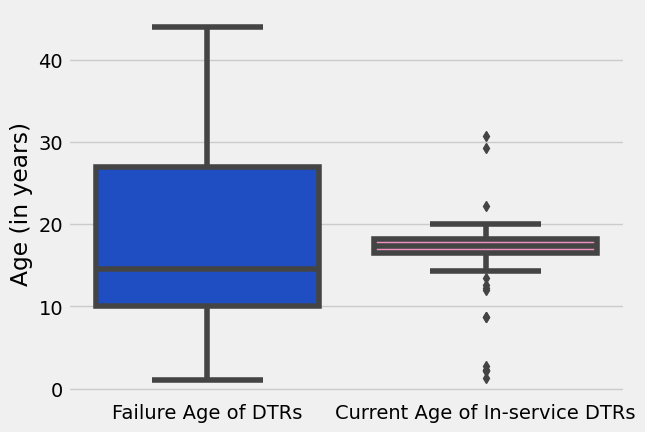

In [229]:
import seaborn as sns
ax = sns.boxplot(data=[data[['Age']], df[['Age']]], palette=[sns.xkcd_rgb["blue"], sns.xkcd_rgb["pink"]], )
ax.set_xticklabels(["Failure Age of DTRs","Current Age of In-service DTRs"])
ax.set_ylabel("Age (in years)")
plt.show()

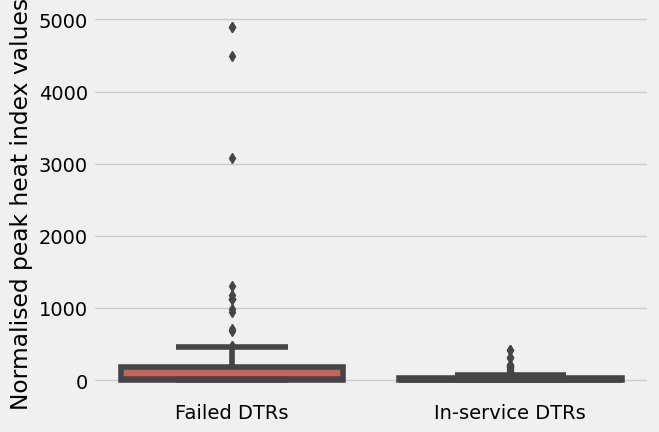

In [230]:
ax = sns.boxplot(data=[data[['normalised peak heat index']], df[['normalised peak heat index']]], palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]], )
ax.set_xticklabels(["Failed DTRs","In-service DTRs"])
ax.set_ylabel("Normalised peak heat index values")
plt.show()

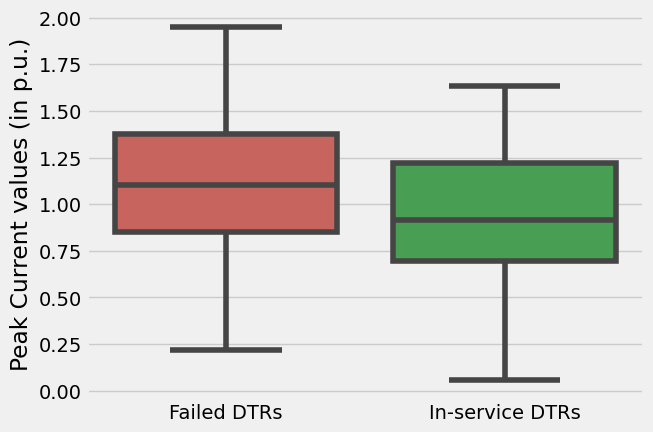

In [205]:
ax = sns.boxplot(data=[data[['Peak Current']], df[['Peak Current']]], palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"]], )
ax.set_xticklabels(["Failed DTRs","In-service DTRs"])
ax.set_ylabel("Peak Current values (in p.u.)")
plt.show()

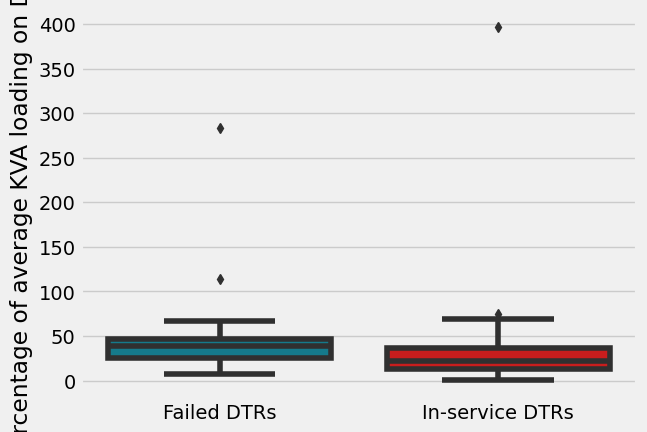

In [206]:
ax = sns.boxplot(data=[data[['% average KVA loading']], df[['% average KVA loading']]], palette=[sns.xkcd_rgb["teal blue"], sns.xkcd_rgb["red"]], )
ax.set_xticklabels(["Failed DTRs","In-service DTRs"])
ax.set_ylabel("percentage of average KVA loading on DTRs")
plt.show()

In [207]:
# Age is the label we want to predict
train_labels = np.array(data['Age'])
# Remove the labels from the features
features = data.drop('Age', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
train_features = np.array(features)

In [208]:
test_labels = np.array(df['Age'])
test_features = df.drop('Age', axis = 1)
test_features = np.array(test_features)

In [209]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (120, 9)
Training Labels Shape: (120,)
Testing Features Shape: (131, 9)
Testing Labels Shape: (131,)


In [210]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1200 decision trees
rf = RandomForestRegressor(n_estimators = 1200, max_depth = 6, random_state = 50)
# Train the model on training data
rf.fit(train_features, train_labels);

In [211]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [212]:
# cannot find MAE, MSE, RMSE since failure ages of in-service DTRs unavailable

from sklearn.metrics import mean_absolute_error, mean_squared_error
#print('Mean absolute error:', mean_absolute_error(test_labels, predictions))
#print('Mean squared error:', mean_squared_error(test_labels, predictions))
#print('Root mean squared error:', np.sqrt(mean_squared_error(test_labels, predictions)))

In [213]:
# printing the current age and the predicted failure age of the DTRs
res = "\n".join("{}    {}".format(x, y) for x, y in zip(test_labels, predictions))
print(res)

16.5    22.188652028777657
17.333    18.83450620752805
19.25    27.04970413392562
16.167    29.61388072569274
17.25    18.18160771789866
19.833    25.258420430178987
17.75    21.68459090208687
19.917    17.45371084157779
20.0    24.42693652811982
18.333    26.92388236057964
16.5    21.13577206336424
16.333    24.313794043852464
16.833    25.928360234014672
18.5    26.29722652147529
17.583    19.01485173237358
18.25    27.30653286338447
18.833    24.599356882529122
17.583    24.946308027433417
17.75    15.270058179653406
17.75    12.82181217951787
19.667    27.36361724793683
17.75    21.94522312277481
17.917    20.991295158405684
16.5    27.4555425286916
16.5    29.02350924606828
17.167    25.75487498348617
17.0    24.935777889747033
17.333    20.129553230639047
19.833    24.935777889747033
16.167    27.742512751551864
17.583    26.29513372102367
16.333    13.584530403193845
17.417    27.67036447342616
16.75    14.410013654724038
16.0    27.300391070311573
18.75    25.132077400665665
17

In [214]:
residual = predictions - test_labels
res2 = "\n".join("{}    {}".format(x, y) for x, y in zip(test_labels, residual))
print(res2)
test = test_labels

16.5    5.688652028777657
17.333    1.5015062075280525
19.25    7.799704133925619
16.167    13.44688072569274
17.25    0.931607717898661
19.833    5.425420430178988
17.75    3.934590902086871
19.917    -2.46328915842221
20.0    4.426936528119821
18.333    8.590882360579641
16.5    4.635772063364239
16.333    7.980794043852466
16.833    9.095360234014674
18.5    7.797226521475292
17.583    1.4318517323735804
18.25    9.056532863384469
18.833    5.766356882529124
17.583    7.363308027433419
17.75    -2.4799418203465944
17.75    -4.92818782048213
19.667    7.696617247936828
17.75    4.195223122774809
17.917    3.0742951584056826
16.5    10.955542528691598
16.5    12.52350924606828
17.167    8.58787498348617
17.0    7.935777889747033
17.333    2.7965532306390486
19.833    5.102777889747035
16.167    11.575512751551862
17.583    8.712133721023672
16.333    -2.748469596806153
17.417    10.25336447342616
16.75    -2.339986345275962
16.0    11.300391070311573
18.75    6.382077400665665
17.167 

Number of DTRs prone to failure =  19


Text(0, 0.5, 'Age of Failure')

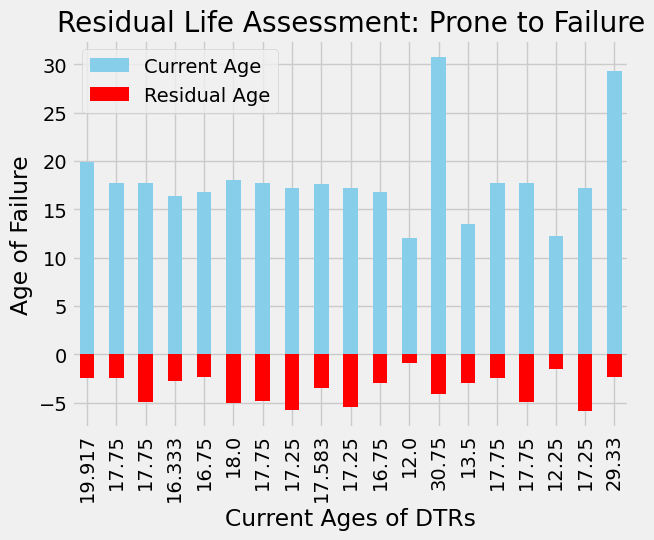

In [215]:
df = pd.DataFrame(columns=['Current Age','Residual Age'])
for i in range(len(residual)):
  if residual[i] < 0:
    df.loc[i, 'Current Age'] = test_labels[i]
    df.loc[i, 'Residual Age'] = residual[i]

df = df.fillna('')
df = df.set_index('Current Age', drop=False)
print("Number of DTRs prone to failure = ", len(df))

# create stacked bar chart for failure-prone DataFrame
df.plot(kind='bar', stacked=True, color=['skyblue', 'red'])

# Add Title and Labels
plt.title('Residual Life Assessment: Prone to Failure')
plt.xlabel('Current Ages of DTRs')
plt.ylabel('Age of Failure')

Number of deteriorated DTRs =  48


Text(0, 0.5, 'Age of Failure')

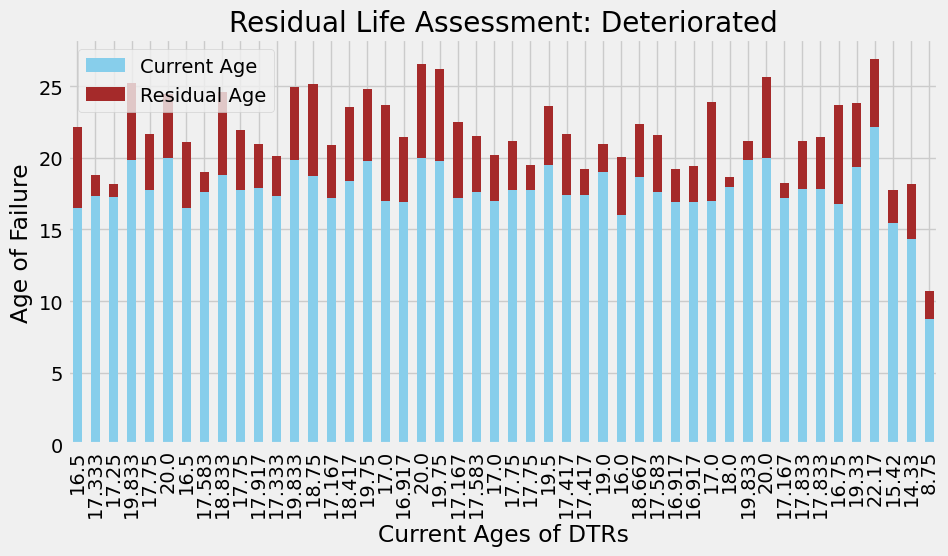

In [216]:
df1 = pd.DataFrame(columns=['Current Age','Residual Age'])
for i in range(len(residual)):
  if residual[i] >= 0 and residual[i] < 7:
    df1.loc[i, 'Current Age'] = test_labels[i]
    df1.loc[i, 'Residual Age'] = residual[i]

df1 = df1.fillna('')
df1 = df1.set_index('Current Age', drop=False)
print("Number of deteriorated DTRs = ", len(df1))

# create stacked bar chart for "deteriorated" DataFrame
df1.plot(kind='bar', stacked=True, figsize=(10,5), color=['skyblue', 'brown'])

# Add Title and Labels
plt.title('Residual Life Assessment: Deteriorated')
plt.xlabel('Current Ages of DTRs')
plt.ylabel('Age of Failure')

Number of DTRs whose conditions are fair =  59


Text(0, 0.5, 'Age of Failure')

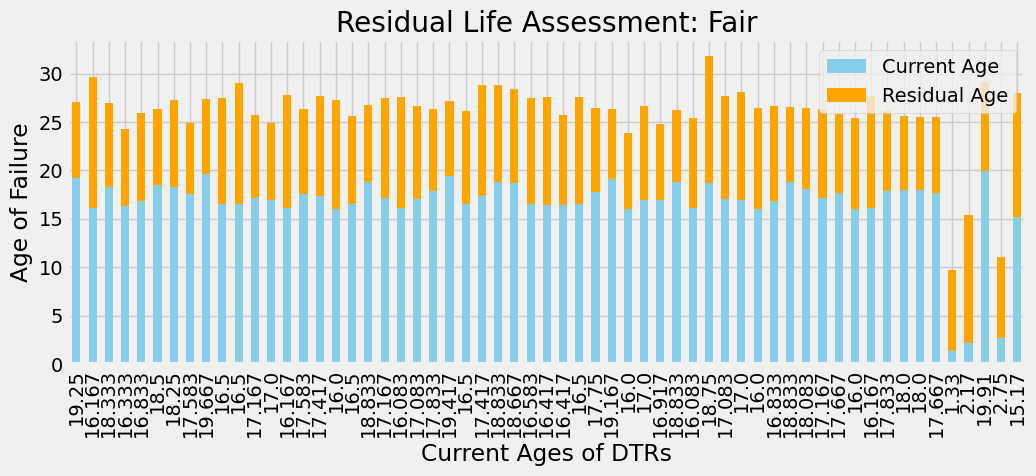

In [217]:
df2 = pd.DataFrame(columns=['Current Age','Residual Age'])
for i in range(len(residual)):
  if residual[i] >= 7 and residual[i] < 14:
    df2.loc[i, 'Current Age'] = test_labels[i]
    df2.loc[i, 'Residual Age'] = residual[i]

df2 = df2.fillna('')
df2 = df2.set_index('Current Age', drop=False)
print("Number of DTRs whose conditions are fair = ", len(df2))

# create stacked bar chart for "deteriorated" DataFrame
df2.plot(kind='bar', stacked=True, figsize=(11,4), color=['skyblue', 'orange'])

# Add Title and Labels
plt.title('Residual Life Assessment: Fair')
plt.xlabel('Current Ages of DTRs')
plt.ylabel('Age of Failure')

Number of good DTRs =  3


Text(0, 0.5, 'Age of Failure')

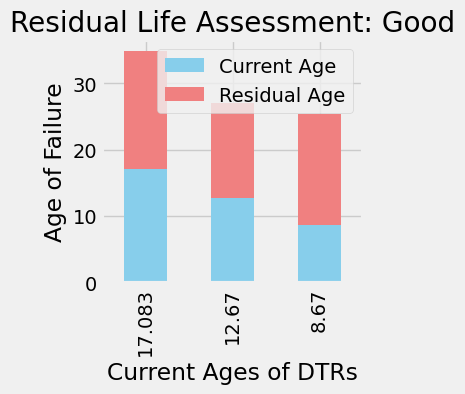

In [218]:
df_g = pd.DataFrame(columns=['Current Age','Residual Age'])
for i in range(len(residual)):
  if residual[i] >= 14 and residual[i] < 21:
    df_g.loc[i, 'Current Age'] = test_labels[i]
    df_g.loc[i, 'Residual Age'] = residual[i]

df_g = df_g.fillna('')
df_g = df_g.set_index('Current Age', drop=False)
print("Number of good DTRs = ", len(df_g))

# create stacked bar chart for "deteriorated" DataFrame
df_g.plot(kind='bar', stacked=True, figsize=(3,3), color=['skyblue', 'lightcoral'])

# Add Title and Labels
plt.title('Residual Life Assessment: Good')
plt.xlabel('Current Ages of DTRs')
plt.ylabel('Age of Failure')

Number of new DTRs =  2


Text(0, 0.5, 'Age of Failure')

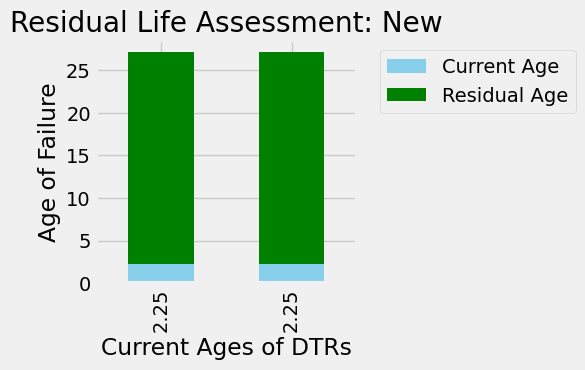

In [219]:
df_n = pd.DataFrame(columns=['Current Age','Residual Age'])
for i in range(len(residual)):
  if residual[i] >= 21:
    df_n.loc[i, 'Current Age'] = test_labels[i]
    df_n.loc[i, 'Residual Age'] = residual[i]

df_n = df_n.fillna('')
df_n = df_n.set_index('Current Age', drop=False)
print("Number of new DTRs = ", len(df_n))

# create stacked bar chart for "deteriorated" DataFrame
df_n.plot(kind='bar', stacked=True, figsize=(3,3), color=['skyblue', 'green'])

# Add Title and Labels
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Residual Life Assessment: New')
plt.xlabel('Current Ages of DTRs')
plt.ylabel('Age of Failure')

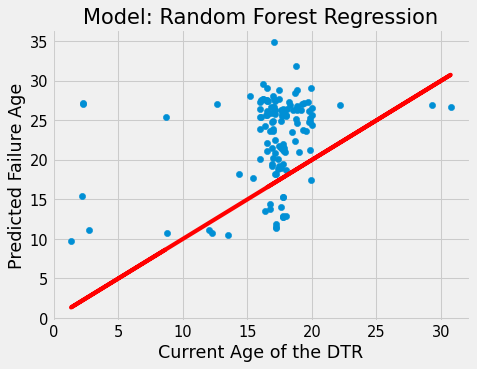

In [220]:
import matplotlib.pyplot as plt
plt.figure(dpi = 75)
#plt.scatter(labels, predictions)
plt.scatter(test_labels, predictions)
#plt.plot(labels, labels, color="red")
plt.plot(test_labels, test_labels, color="red")
plt.xlabel("Current Age of the DTR")
plt.ylabel("Predicted Failure Age")
plt.title("Model: Random Forest Regression")
plt.show()

In [221]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: updated make Score   Importance: 0.69
Variable: Peak Current         Importance: 0.08
Variable: % average KVA loading Importance: 0.07
Variable: normalised peak heat index Importance: 0.07
Variable: godown overhauling   Importance: 0.04
Variable: O/D                  Importance: 0.03
Variable: NEW/REP              Importance: 0.01
Variable: Cooling Circuit choked observation  Importance: 0.01
Variable: LT fault             Importance: 0.0


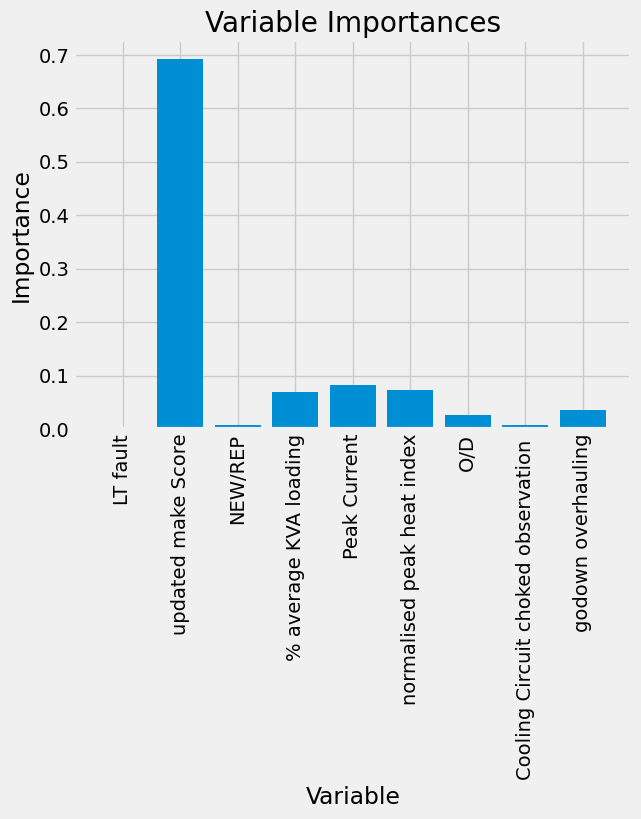

In [222]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');